<a href="https://colab.research.google.com/github/tarun2521/diabetes/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Required Libraries Loaded



In [1]:
! git clone "https://github.com/tarun2521/diabetes.git"

Cloning into 'diabetes'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 9.49 KiB | 9.49 MiB/s, done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow

#### Dataset uploading

In [3]:
diabetes=pd.read_csv("/content/diabetes/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Dataset Visualization

<Axes: xlabel='Outcome', ylabel='count'>

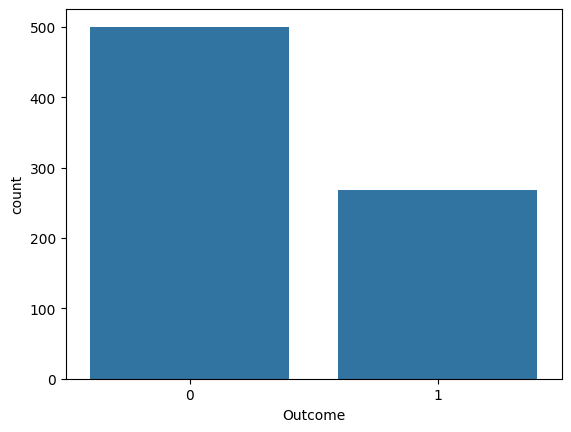

In [6]:
sns.countplot(x="Outcome", data=diabetes)

<Axes: >

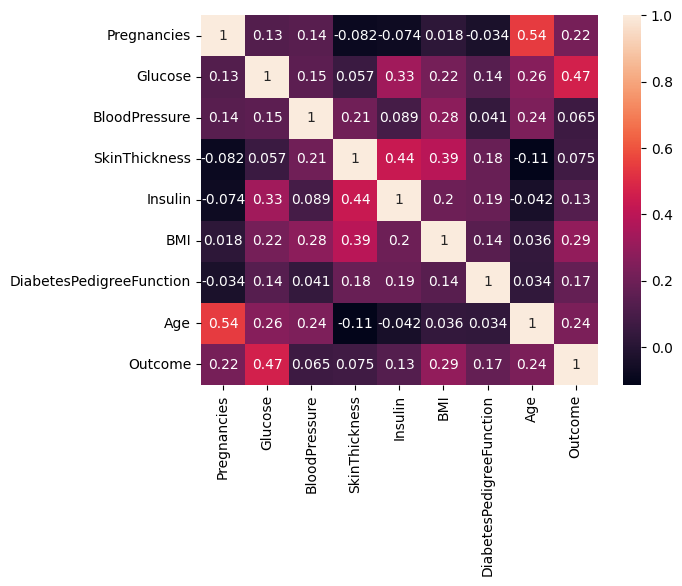

In [7]:
sns.heatmap(diabetes.corr(), annot=True)

In [8]:
x=diabetes.iloc[0:,0:8].values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [9]:
y=diabetes.iloc[:,8].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [10]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)


x_train: (614, 8)
y_train: (614,)
x_test: (154, 8)
y_test: (154,)


#### Model Training

In [12]:
classifier=tensorflow.keras.models.Sequential()
classifier.add(tensorflow.keras.layers.Dense(units=400,activation='relu',input_shape=(8, )))
classifier.add(tensorflow.keras.layers.Dropout(0.2))
classifier.add(tensorflow.keras.layers.Dense(units=400,activation='relu'))
classifier.add(tensorflow.keras.layers.Dropout(0.2))
classifier.add(tensorflow.keras.layers.Dense(units=1,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 400)                 │           3,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             401 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,401 (642.19 KB)

 Trainable params: 164,401 (642.19 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
epochs=classifier.fit(x_train,y_train,epochs=20)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6947 - loss: 0.6016
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7769 - loss: 0.4492
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7896 - loss: 0.4504
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7850 - loss: 0.4410
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7817 - loss: 0.4613
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7959 - loss: 0.4358
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8252 - loss: 0.3905
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7705 - loss: 0.4318
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8279 - loss: 0.4096
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7927 - loss: 0.4192
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8058 - loss: 0.4111
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8098 - 

In [14]:
y_pred=classifier.predict(x_test)
y_pred

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[9.8894566e-01],
       [3.2917064e-02],
       [6.7521684e-02],
       [6.5488940e-01],
       [2.9737549e-02],
       [2.6220975e-03],
       [8.8824058e-01],
       [7.3210591e-01],
       [3.1620100e-01],
       [1.6282173e-01],
       [7.0226961e-01],
       [8.0649483e-01],
       [1.4620465e-01],
       [1.6656481e-01],
       [4.1337556e-01],
       [1.8976173e-01],
       [9.4904423e-01],
       [7.0513855e-04],
       [1.9014928e-01],
       [3.5949397e-01],
       [7.1767348e-01],
       [1.2791826e-01],
       [1.5985164e-01],
       [1.8874829e-01],
       [6.5490400e-04],
       [5.4002899e-01],
       [2.0699052e-03],
       [9.8051250e-01],
       [1.7796909e-02],
       [1.2848462e-01],
       [3.3815658e-01],
       [2.1831104e-01],
       [2.5267309e-02],
       [6.8049079e-01],
       [6.2149372e-03],
       [8.0173200e-01],
       [3.5889673e-01],
       [4.1030655e-03],
       [4.5917615e-01],
       [9.2325300e-01],
       [2.4718268e-01],
       [5.916038

In [15]:
y_pred=(y_pred>0.5)
y_pred[:10]

array([[ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False]])

In [16]:
y_test1=(y_test>0.5)
y_test1[:10]

array([ True, False, False,  True, False, False,  True,  True, False,
       False])

####Model evaluation

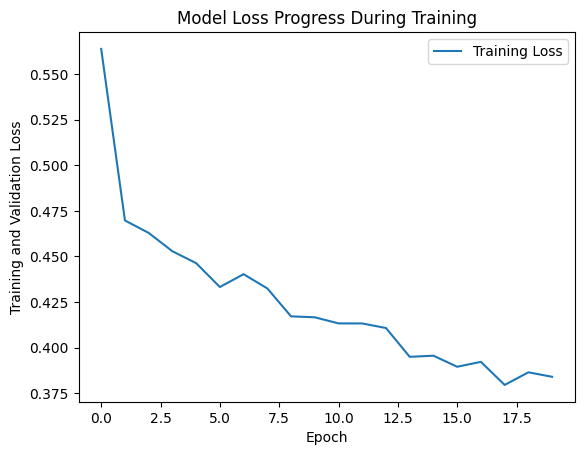

In [17]:
plt.plot(epochs.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss'])

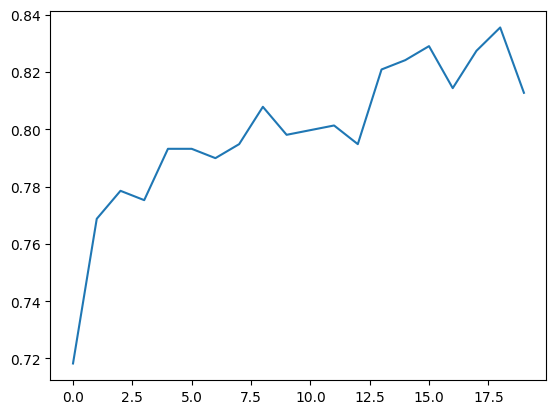

In [18]:
plt.plot(epochs.history['accuracy'])

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<Axes: >

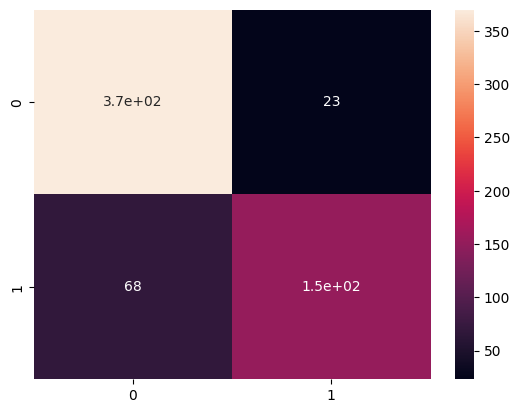

In [19]:
y_train_pred=classifier.predict(x_train)
y_train_pred=(y_train_pred>0.5)
cm=confusion_matrix(y_train,y_train_pred)
sns.heatmap(cm,annot=True)


*   58 person were diagnosed with diabetes when actually they did not have diabetes
*   41 were diagnosed not have diabetes when actually they did have diabetes




In [20]:
print(classification_report(y_train_pred,y_train))

              precision    recall  f1-score   support

       False       0.94      0.84      0.89       438
        True       0.69      0.87      0.77       176

    accuracy                           0.85       614
   macro avg       0.82      0.86      0.83       614
weighted avg       0.87      0.85      0.86       614



####predictions

In [21]:
Pregnancies=eval(input("Number of times the person has been pregnant:"))
Glucose=eval(input("Plasma glucose concentration (mg/dL) after a 2-hour oral glucose tolerance test:"))
BloodPressure=eval(input("Diastolic blood pressure (mm Hg):"))
SkinThickness=eval(input("Triceps skin fold thickness (mm), indicating body fat percentage:"))
Insulin=eval(input("2-hour serum insulin level (μU/ml):"))
BMI=eval(input("Body Mass Index (weight in kg/(height in m)^2), a measure of body fat:"))
DiabetesPedigreeFunction=eval(input("A score showing how likely the person is to develop diabetes based on family history:"))
Age=eval(input("Age of the individual (years):"))
input=np.array([[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]])
prediction=classifier.predict(input)
if prediction==[1]:
  print("The person is diabetic")
else:
  print("The person is not diabetic")

Number of times the person has been pregnant:6
Plasma glucose concentration (mg/dL) after a 2-hour oral glucose tolerance test:148
Diastolic blood pressure (mm Hg):72
Triceps skin fold thickness (mm), indicating body fat percentage:35
2-hour serum insulin level (μU/ml):0
Body Mass Index (weight in kg/(height in m)^2), a measure of body fat:33.6
A score showing how likely the person is to develop diabetes based on family history:0.627
Age of the individual (years):50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The person is diabetic
